# 6_data_analysis.ipynb

Analyzes the tagging performance.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
from pprint import pprint
from sklearn.metrics import precision_score, recall_score, f1_score
from pprint import pprint

# Create test set based on labels

In [120]:
result_folder = 'data_result'
os.makedirs(result_folder, exist_ok=True)

input_file = result_folder + '/' + 'Result.xlsx'
extended_file = result_folder + '/' + 'Result_extended.xlsx'

df = pd.read_excel(input_file)
print(df.shape)

(1000, 17)


In [121]:
subreddit_list = ['cancer', 'COVID19positive', 'diabetes', 'eczema', 'eyetriage', 'GERD', 'STD']

def get_label_int(label_str, subreddit):
    if label_str == 'CANCER' and subreddit == 'cancer' or \
        label_str == 'COVID' and subreddit == 'COVID19positive' or \
        label_str == 'DIABETES' and subreddit == 'diabetes' or \
        label_str == 'ECZEMA' and subreddit == 'eczema' or \
        label_str == 'EYE' and subreddit == 'eyetriage' or \
        label_str == 'GERD' and subreddit == 'GERD' or \
        label_str == 'STD' and subreddit == 'STD':
        return int(1)
    else:
        return int(0)
    
for subreddit in subreddit_list:
    df[subreddit + '_label'] = df.apply(lambda row: get_label_int(row['LABEL'], subreddit), axis=1)

In [122]:
# df.to_excel(extended_file, index=None, header=True)
# !open '/Applications/Microsoft Excel.app' $extended_file

In [123]:
print(df.shape)

(1000, 24)


# Extract inference results

In [124]:
y_pred = df.iloc[:, 8:15].values
print(y_pred.shape)
pprint(y_pred)

(1000, 7)
array([[6.21587040e-04, 3.25265200e-01, 5.32597300e-04, ...,
        4.81468440e-03, 2.18958680e-01, 1.04136765e-02],
       [2.26809380e-02, 2.44800150e-02, 1.24443140e-01, ...,
        3.87337500e-02, 8.51780200e-04, 1.86413530e-04],
       [3.68714330e-04, 9.85343930e-01, 9.73552470e-04, ...,
        7.34090800e-04, 4.85836270e-02, 5.93811300e-04],
       ...,
       [6.63929300e-01, 3.70893180e-02, 7.46101140e-04, ...,
        3.29810380e-03, 1.80878340e-02, 9.45812500e-03],
       [4.50914960e-05, 1.93762780e-03, 9.95240330e-01, ...,
        1.78307300e-04, 2.55670200e-05, 5.07488400e-06],
       [5.39876600e-06, 4.48846800e-03, 9.98531000e-01, ...,
        1.58268380e-05, 5.81170000e-06, 5.93990600e-06]])


# Extract test set

In [125]:
y_test = df.iloc[:, 17:25].values
print(y_test.shape)
pprint(y_test)

(1000, 7)
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


In [126]:
thresholds=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for val in thresholds:
    pred=y_pred.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Threshold: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(val, precision, recall, f1))

Threshold: 0.1000, Precision: 0.3312, Recall: 0.9903, F1-measure: 0.4964
Threshold: 0.2000, Precision: 0.4449, Recall: 0.9855, F1-measure: 0.6131
Threshold: 0.2500, Precision: 0.4915, Recall: 0.9758, F1-measure: 0.6537
Threshold: 0.3000, Precision: 0.5268, Recall: 0.9734, F1-measure: 0.6836
Threshold: 0.4000, Precision: 0.5925, Recall: 0.9517, F1-measure: 0.7303
Threshold: 0.5000, Precision: 0.6586, Recall: 0.9227, F1-measure: 0.7686
Threshold: 0.6000, Precision: 0.7065, Recall: 0.8720, F1-measure: 0.7805
Threshold: 0.7000, Precision: 0.7523, Recall: 0.7778, F1-measure: 0.7648
Threshold: 0.8000, Precision: 0.7861, Recall: 0.6836, F1-measure: 0.7313
Threshold: 0.9000, Precision: 0.8387, Recall: 0.5652, F1-measure: 0.6753


In [127]:
column_names = list(df.columns[8:15])
f1_scores = []
threshold = 0.6
for i in range(0, 7):
    disease_prediction = y_pred[:,i]
    disease_prediction[disease_prediction>=threshold]=1
    disease_prediction[disease_prediction<threshold]=0
    disease_test = y_test[:,i]
    precision = precision_score(disease_test, disease_prediction)
    recall = recall_score(disease_test, disease_prediction)
    f1 = f1_score(disease_test, disease_prediction)
    f1_scores.append(f1)
    print("Disease: {}, Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(column_names[i], precision, recall, f1))

Disease: CANCER, Precision: 0.7375, Recall: 0.7973, F1-measure: 0.7662
Disease: COVID, Precision: 0.5769, Recall: 0.8491, F1-measure: 0.6870
Disease: DIABETES, Precision: 0.5278, Recall: 0.9500, F1-measure: 0.6786
Disease: ECZEMA, Precision: 0.8605, Recall: 0.9250, F1-measure: 0.8916
Disease: EYE, Precision: 0.8000, Recall: 0.8000, F1-measure: 0.8000
Disease: GERD, Precision: 0.6230, Recall: 0.9048, F1-measure: 0.7379
Disease: STD, Precision: 0.8961, Recall: 0.8961, F1-measure: 0.8961


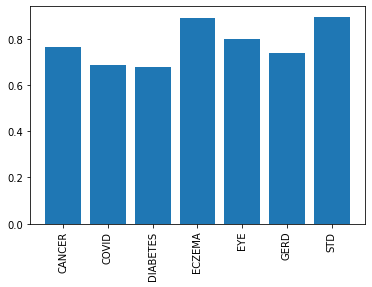

In [128]:
fig = plt.figure()
plt.bar(column_names, f1_scores)
plt.xticks(rotation=90)
plt.show()